### [Spaceship Tainic](https://www.kaggle.com/competitions/spaceship-titanic)
![alt text](https://storage.googleapis.com/kaggle-media/competitions/Spaceship%20Titanic/joel-filipe-QwoNAhbmLLo-unsplash.jpg)




歡迎來到 2912 年，需要您的數據科學技能來解開宇宙之謎。 我們收到了來自四光年外的信號，情況看起來不太好。

泰坦尼克號宇宙飛船是一個月前下水的一艘星際客輪。 船上載有近 13,000 名乘客，這艘船開始了它的處女航，將太陽系的移民運送到繞附近恆星運行的三顆新的宜居系外行星。

在繞行半人馬座阿爾法星前往其第一個目的地（炎熱的 55 Cancri E 巨蟹座55A的太陽系外行星）途中，粗心的泰坦尼克號宇宙飛船與隱藏在塵埃雲中的時空異常相撞。 可悲的是，它遭遇了與 1000 年前同名的相似命運。 雖然飛船完好無損，但幾乎一半的乘客都被傳送到了異次元！






### 特徵說明：

* PassengerId - 每個乘客的唯一 ID。 每個 ID 均採用 gggg_pp 形式，其中 gggg 表示乘客所在的團體，pp 是他們在團體中的號碼。 群體中的人通常是家庭成員，但並非總是如此。
* HomePlanet - 乘客離開的星球，通常是他們永久居住的星球。
* CryoSleep - 指示乘客是否選擇在航程期間處於假死狀態。 處於冷凍睡眠狀態的乘客被限制在自己的客艙內。
* Cabin - 乘客所居住的客艙號碼。 採用甲板/數字/側面的形式，其中側面可以是表示左舷的 P 或表示右舷的 S。
* Destination - 乘客將要下船前往的星球。
* Age - 乘客的年齡。
* VIP — 旅客在航程中是否已付費享受特殊VIP服務。豪華設施中支付的費用。
>* RoomService - 客房服務
>* FoodCourt - 美食廣場
>* ShoppingMall - 購物中心
>* Spa - 水療中心
>* VRDeck - 虛擬甲板。
* Name - 乘客的名字和姓氏。
* Transported - 乘客是否被傳送到另一個維度。 這是目標，即您嘗試預測的列。

載入套件

In [157]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from ydata_profiling import ProfileReport
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')


## 載入資料

In [158]:
train_df = pd.read_csv('./spaceship titanic/train.csv')
test_df = pd.read_csv('./spaceship titanic/test.csv')

概觀總覽數據內容與資料型態

In [159]:
train_df.tail()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False
8692,9280_02,Europa,False,E/608/S,TRAPPIST-1e,44.0,False,126.0,4688.0,0.0,0.0,12.0,Propsh Hontichre,True


In [160]:
# 查看各欄位資料型態與缺失值
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [161]:
train_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
PassengerId,8693,8693,0001_01,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HomePlanet,8492,3,Earth,4602,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CryoSleep,8476,2,False,5439,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cabin,8494,6560,G/734/S,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Destination,8511,3,TRAPPIST-1e,5915,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,8514.0,NaN,NaN,NaN,28.82793,14.489021,0.0,19.0,27.0,38.0,79.0
VIP,8490,2,False,8291,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RoomService,8512.0,NaN,NaN,NaN,224.687617,666.717663,0.0,0.0,0.0,47.0,14327.0
FoodCourt,8510.0,NaN,NaN,NaN,458.077203,1611.48924,0.0,0.0,0.0,76.0,29813.0
ShoppingMall,8485.0,NaN,NaN,NaN,173.729169,604.696458,0.0,0.0,0.0,27.0,23492.0


檢查缺失值與重複值

In [162]:
print("Train missing values: \n", train_df.isna().sum())
print("Test missing values: \n",test_df.isna().sum())
print("Train duplicated values: ",train_df.duplicated().sum())
print("Test duplicated values: ",test_df.duplicated().sum())

Train missing values: 
 PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64
Test missing values: 
 PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64
Train duplicated values:  0
Test duplicated values:  0


In [163]:
# profile = ProfileReport(train_df, title="Spaceship Titanic Train Data Profiling Report")
# profile.to_widgets()
# profile.to_notebook_iframe()


## 資料探索、分析與清理

In [164]:
# 拆分乘客ID
train_df[['ID1','ID2']] = train_df['PassengerId'].str.split("_", expand=True)
test_df[['ID1','ID2']] = test_df['PassengerId'].str.split("_", expand=True)
PassengerId = test_df['PassengerId']

# 新增同行人數
train_df['family_size'] = 1
test_df['family_size'] = 1
list1 = train_df['ID1'].unique()
for i in list1:
    list2 = train_df[train_df['ID1'] == i].index.to_list()
    train_df.loc[list2,'family_size'] = len(list2)
list1 = test_df['ID1'].unique()
for i in list1:
    list2 = test_df[test_df['ID1'] == i].index.to_list()
    test_df.loc[list2,'family_size'] = len(list2)    

Family_size 推測資料清理

In [165]:
# 清理部份Cabin缺失值
list1 = train_df[(train_df['Cabin'].isna()==True)&(train_df['family_size']>1)].index.to_list()
for i in list1:
    if train_df.loc[i,'ID2'] == '01':
        train_df.loc[i,'Cabin'] = train_df.loc[i+1,'Cabin']
    else:
        train_df.loc[i,'Cabin'] = train_df.loc[i-1,'Cabin']
list1 = test_df[(test_df['Cabin'].isna()==True)&(test_df['family_size']>1)].index.to_list()
for i in list1:
    if test_df.loc[i,'ID2'] == '01':
        test_df.loc[i,'Cabin'] = test_df.loc[i+1,'Cabin']   
    else:
        test_df.loc[i,'Cabin'] = test_df.loc[i-1,'Cabin']     

# 清理部份HomePlanet缺失值
list1 = train_df[(train_df['HomePlanet'].isna()==True)&(train_df['family_size']>1)].index.to_list()
for i in list1:
    if train_df.loc[i,'ID2'] == '01':
        train_df.loc[i,'HomePlanet'] = train_df.loc[i+1,'HomePlanet']
    else:
        train_df.loc[i,'HomePlanet'] = train_df.loc[i-1,'HomePlanet']
        
list1 = test_df[(test_df['HomePlanet'].isna()==True)&(test_df['family_size']>1)].index.to_list()
for i in list1:
    if test_df.loc[i,'ID2'] == '01':
        test_df.loc[i,'HomePlanet'] = test_df.loc[i+1,'HomePlanet']
    else:
        test_df.loc[i,'HomePlanet'] = test_df.loc[i-1,'HomePlanet']

In [166]:
# 分割艙位內容資訊
train_df[["Deck", "Cabin_num", "Side"]] = train_df["Cabin"].str.split("/", expand=True)
test_df[["Deck", "Cabin_num", "Side"]] = test_df["Cabin"].str.split("/", expand=True)
train_df.drop("Cabin", axis=1, inplace=True)
test_df.drop("Cabin", axis=1, inplace=True)

In [167]:
# 13歲以下單獨旅行無VIP
train_df[(train_df['family_size']==1)& (train_df['Age']<13) & (train_df['VIP'].isna()==True)]

# 假死狀態不消費
train_df.loc[train_df[train_df['CryoSleep']==True].index,['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']]=0
test_df.loc[test_df[test_df['CryoSleep']==True].index,['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']]=0
# 13歲以下單獨旅行清除部份VIP
train_df.loc[train_df[(train_df['family_size']==1)& (train_df['Age']<13)].index,['VIP']]=False
test_df.loc[test_df[(test_df['family_size']==1)& (test_df['Age']<13)].index,['VIP']]=False

# 13歲以下不進行消費
train_df.loc[train_df[train_df['Age']<13].index,['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']]=0
test_df.loc[test_df[test_df['Age']<13].index,['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']]=0

train_df['Spend'] = train_df['RoomService'].fillna(0)+train_df['FoodCourt'].fillna(0)+train_df['ShoppingMall'].fillna(0)+train_df['Spa'].fillna(0)+train_df['VRDeck'].fillna(0)
test_df['Spend'] = test_df['RoomService'].fillna(0)+test_df['FoodCourt'].fillna(0)+test_df['ShoppingMall'].fillna(0)+test_df['Spa'].fillna(0)+test_df['VRDeck'].fillna(0)

# 假死狀態不消費
train_df.loc[train_df[(train_df['CryoSleep'].isna()==True)&(train_df['Spend']>0)].index,'CryoSleep']=False
test_df.loc[test_df[(test_df['CryoSleep'].isna()==True)&(test_df['Spend']>0)].index,'CryoSleep']=False

In [168]:
# 清除姓名和家鄉星球缺失值 以同艙位為參考
for i in range(len(train_df)):
    if train_df.loc[i,'ID2'] == '01':
        if pd.isna(train_df.loc[i,'Name']):
            if train_df.loc[i+1,'ID2'] != '01':
                train_df.loc[i,'Name'] = train_df.loc[i+1,'Name']
        if pd.isna(train_df.loc[i,'HomePlanet']):
            if train_df.loc[i+1,'ID2'] != '01':
                train_df.loc[i,'HomePlanet'] = train_df.loc[i+1,'HomePlanet']                
    else :
        if pd.isna(train_df.loc[i,'Name']):
            train_df.loc[i,'Name'] = train_df.loc[i-1,'Name']
        if pd.isna(train_df.loc[i,'HomePlanet']):
            train_df.loc[i,'HomePlanet'] = train_df.loc[i-1,'HomePlanet']
for i in range(len(test_df)):
    if test_df.loc[i,'ID2'] == '01':
        if pd.isna(test_df.loc[i,'Name']):
            if test_df.loc[i+1,'ID2'] != '01':
                test_df.loc[i,'Name'] = test_df.loc[i+1,'Name']
        if pd.isna(test_df.loc[i,'HomePlanet']):
            if test_df.loc[i+1,'ID2'] != '01':
                test_df.loc[i,'HomePlanet'] = test_df.loc[i+1,'HomePlanet']
    else :
        if pd.isna(test_df.loc[i,'Name']):
            test_df.loc[i,'Name'] = test_df.loc[i-1,'Name']
        if pd.isna(test_df.loc[i,'HomePlanet']):
            test_df.loc[i,'HomePlanet'] = test_df.loc[i-1,'HomePlanet']


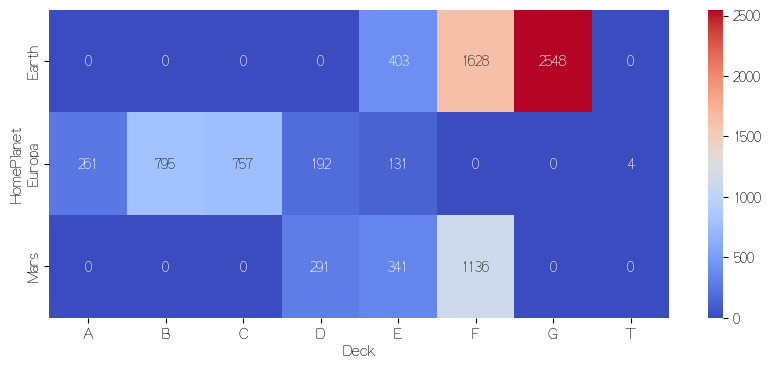

In [169]:
CDHP_gb=train_df.groupby(['Deck','HomePlanet'])['HomePlanet'].size().unstack().fillna(0)
# Heatmap of missing values
plt.figure(figsize=(10,4))
sns.heatmap(CDHP_gb.T, annot=True, fmt='g', cmap='coolwarm');

In [170]:
train_df.loc[train_df[(train_df['HomePlanet'].isna()==True)&(train_df['Deck'].isin(['A','B','C']))].index,['HomePlanet']]='Europa'
test_df.loc[test_df[(test_df['HomePlanet'].isna()==True)&(test_df['Deck'].isin(['A','B','C']))].index,['HomePlanet']]='Europa'
train_df.loc[train_df[(train_df['HomePlanet'].isna()==True)&(train_df['Deck'].isin(['T']))].index,['HomePlanet']]='Europa'
test_df.loc[test_df[(test_df['HomePlanet'].isna()==True)&(test_df['Deck'].isin(['T']))].index,['HomePlanet']]='Europa'
train_df.loc[train_df[(train_df['HomePlanet'].isna()==True)&(train_df['Deck'].isin(['G']))].index,['HomePlanet']]='Earth'
test_df.loc[test_df[(test_df['HomePlanet'].isna()==True)&(test_df['Deck'].isin(['G']))].index,['HomePlanet']]='Earth'


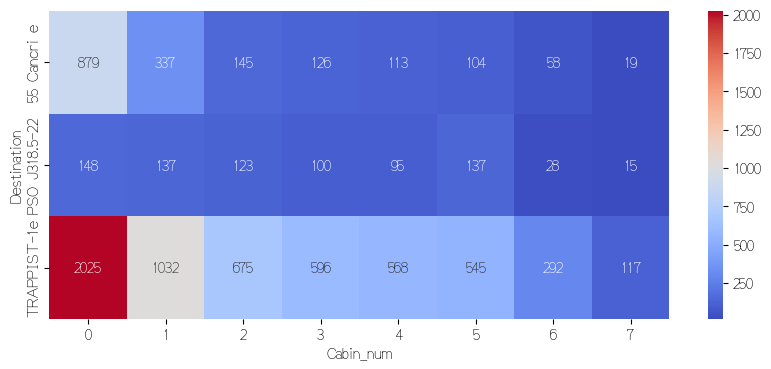

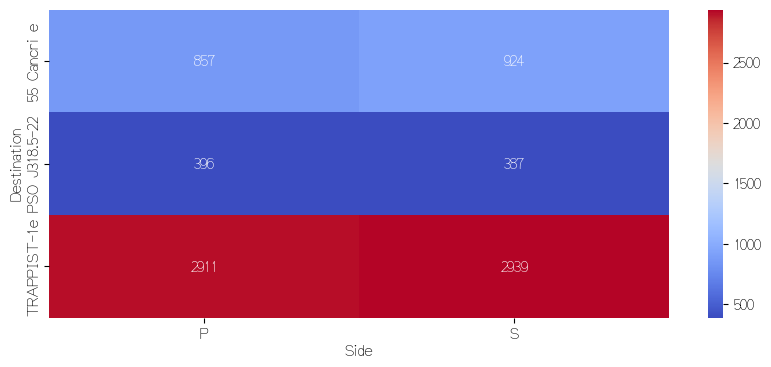

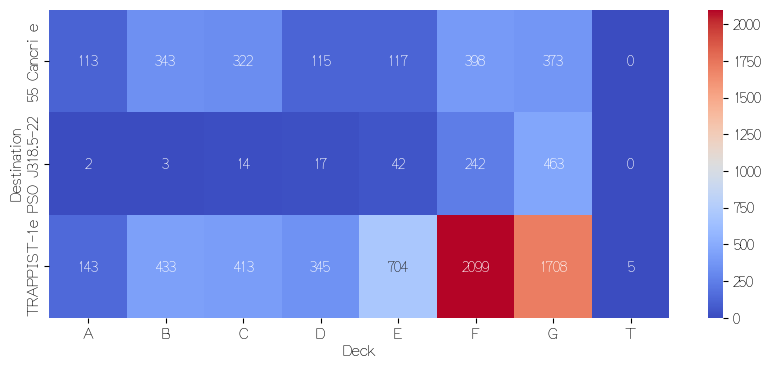

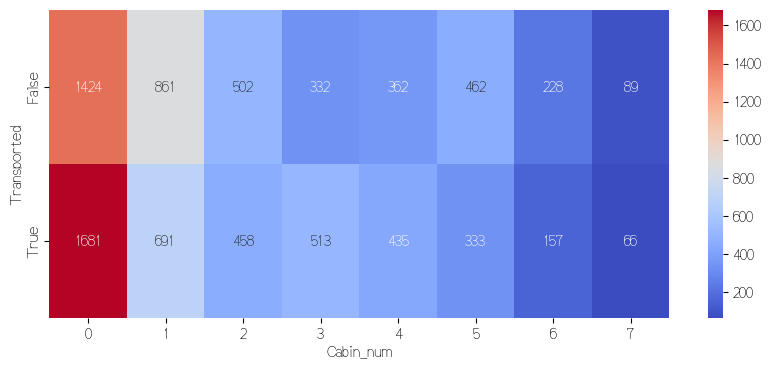

In [171]:
# 確認目的地與 Cabin_num 的關係
chk_df = train_df[train_df['Deck'].isna()==False]
chk_df.groupby(['Destination','Cabin_num'])['Cabin_num'].count()
chk_df['Cabin_num'] = chk_df['Cabin_num'].astype(int)
chk_df.loc[chk_df['Cabin_num'] <= 250, 'Cabin_num'] = 0
chk_df.loc[((chk_df['Cabin_num'] > 250) & (chk_df['Cabin_num'] <= 500)), 'Cabin_num'] = 1
chk_df.loc[((chk_df['Cabin_num'] > 500) & (chk_df['Cabin_num'] <= 750)), 'Cabin_num'] = 2
chk_df.loc[((chk_df['Cabin_num'] > 750) & (chk_df['Cabin_num'] <= 1000)), 'Cabin_num'] = 3
chk_df.loc[((chk_df['Cabin_num'] > 1000) & (chk_df['Cabin_num'] <= 1250)), 'Cabin_num'] = 4
chk_df.loc[((chk_df['Cabin_num'] > 1250) & (chk_df['Cabin_num'] <= 1500)), 'Cabin_num'] = 5
chk_df.loc[((chk_df['Cabin_num'] > 1500) & (chk_df['Cabin_num'] <= 1750)), 'Cabin_num'] = 6
chk_df.loc[chk_df['Cabin_num'] > 1750, 'Cabin_num'] = 7

CDHP_gb=chk_df.groupby(['Cabin_num','Destination'])['Destination'].size().unstack().fillna(0)
# Heatmap of missing values
plt.figure(figsize=(10,4))
sns.heatmap(CDHP_gb.T, annot=True, fmt='g', cmap='coolwarm');

CDHP_gb=chk_df.groupby(['Side','Destination'])['Destination'].size().unstack().fillna(0)
# Heatmap of missing values
plt.figure(figsize=(10,4))
sns.heatmap(CDHP_gb.T, annot=True, fmt='g', cmap='coolwarm');

CDHP_gb=chk_df.groupby(['Deck','Destination'])['Destination'].size().unstack().fillna(0)
# Heatmap of missing values
plt.figure(figsize=(10,4))
sns.heatmap(CDHP_gb.T, annot=True, fmt='g', cmap='coolwarm');

CDHP_gb=chk_df.groupby(['Cabin_num','Transported'])['Transported'].size().unstack().fillna(0)
# Heatmap of missing values
plt.figure(figsize=(10,4))
sns.heatmap(CDHP_gb.T, annot=True, fmt='g', cmap='coolwarm');

In [172]:
train_df[(train_df['VIP']==True)].count()
train_df.groupby(['HomePlanet','VIP'])['VIP'].count()

HomePlanet  VIP  
Earth       False    4561
Europa      False    1994
            True      132
Mars        False    1681
            True       64
Name: VIP, dtype: int64

In [173]:
# 艙等與 消費 的關係
chk_df = train_df.copy()
chk_df.loc[chk_df['Spend'] <= 250, 'Spend'] = 0
chk_df.loc[((chk_df['Spend'] > 250) & (chk_df['Spend'] <= 500)), 'Spend'] = 1
chk_df.loc[((chk_df['Spend'] > 500) & (chk_df['Spend'] <= 750)), 'Spend'] = 2
chk_df.loc[((chk_df['Spend'] > 750) & (chk_df['Spend'] <= 1000)), 'Spend'] = 3
chk_df.loc[((chk_df['Spend'] > 1000) & (chk_df['Spend'] <= 1250)), 'Spend'] = 4
chk_df.loc[((chk_df['Spend'] > 1250) & (chk_df['Spend'] <= 1500)), 'Spend'] = 5
chk_df.loc[((chk_df['Spend'] > 1500) & (chk_df['Spend'] <= 1750)), 'Spend'] = 6
chk_df.loc[chk_df['Spend'] > 1750, 'Spend'] = 7


train_df.groupby(['HomePlanet','Deck','Spend'])['Spend'].mean()

HomePlanet  Deck  Spend 
Earth       E     0.0          0.0
                  10.0        10.0
                  33.0        33.0
                  52.0        52.0
                  69.0        69.0
                             ...  
Mars        F     7348.0    7348.0
                  7349.0    7349.0
                  7404.0    7404.0
                  7405.0    7405.0
                  7406.0    7406.0
Name: Spend, Length: 2754, dtype: float64

<Axes: xlabel='Deck', ylabel='Spend'>

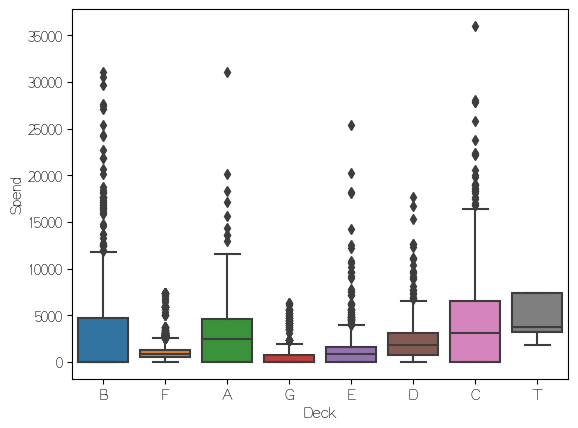

In [174]:
sns.boxplot(data=train_df,x='Deck',y='Spend')

In [175]:
train_df[(train_df['VIP']==True)&(train_df['HomePlanet']=='Mars')&(train_df['CryoSleep']==False)]

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,ID1,ID2,family_size,Deck,Cabin_num,Side,Spend
120,0128_01,Mars,False,TRAPPIST-1e,61.0,True,2353.0,334.0,9.0,316.0,2.0,Grohs Fles,False,0128,01,2,D,3,S,3014.0
214,0224_01,Mars,False,TRAPPIST-1e,32.0,True,181.0,0.0,5.0,1634.0,0.0,Blues Queen,False,0224,01,1,F,42,S,1820.0
363,0401_01,Mars,False,TRAPPIST-1e,30.0,True,1056.0,0.0,0.0,0.0,0.0,Luse Pimne,False,0401,01,2,D,14,S,1056.0
366,0403_01,Mars,False,TRAPPIST-1e,43.0,True,353.0,896.0,0.0,0.0,2.0,Push Wate,True,0403,01,1,D,13,P,1251.0
404,0444_01,Mars,False,TRAPPIST-1e,32.0,True,2484.0,429.0,102.0,0.0,0.0,Camonk Curte,False,0444,01,2,D,15,P,3015.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8065,8620_01,Mars,False,TRAPPIST-1e,35.0,True,1234.0,35.0,7.0,0.0,0.0,Cinets Crité,False,8620,01,1,F,1659,S,1276.0
8289,8852_02,Mars,False,TRAPPIST-1e,41.0,True,22.0,484.0,354.0,0.0,0.0,Toats Homin,False,8852,02,2,D,278,P,860.0
8339,8905_01,Mars,False,TRAPPIST-1e,32.0,True,0.0,0.0,0.0,0.0,0.0,Flakes Dutte,True,8905,01,1,E,570,P,0.0
8357,8941_01,Mars,False,TRAPPIST-1e,26.0,True,1.0,445.0,170.0,614.0,68.0,Quits Perie,False,8941,01,3,E,575,P,1298.0


In [176]:
# 。。。地球人不配成為 VIP
train_df[(train_df['HomePlanet']=='Earth')&(train_df['VIP'].isna()==True)] 
train_df.loc[train_df[(train_df['HomePlanet']=='Earth')&(train_df['VIP'].isna()==True)].index,'VIP']=False
test_df.loc[test_df[(test_df['HomePlanet']=='Earth')&(test_df['VIP'].isna()==True)].index,'VIP']=False

In [177]:
train_df['Spend'] = train_df['RoomService'].fillna(0)+train_df['FoodCourt'].fillna(0)+train_df['ShoppingMall'].fillna(0)+train_df['Spa'].fillna(0)+train_df['VRDeck'].fillna(0)
test_df['Spend'] = test_df['RoomService'].fillna(0)+test_df['FoodCourt'].fillna(0)+test_df['ShoppingMall'].fillna(0)+test_df['Spa'].fillna(0)+test_df['VRDeck'].fillna(0)
# 檢查缺失值數量 
print(train_df.isnull().sum())
print('='*30)
print(test_df.isnull().sum())

PassengerId       0
HomePlanet       63
CryoSleep        98
Destination     182
Age             179
VIP              86
RoomService     107
FoodCourt       106
ShoppingMall    103
Spa             114
VRDeck          107
Name            104
Transported       0
ID1               0
ID2               0
family_size       0
Deck             99
Cabin_num        99
Side             99
Spend             0
dtype: int64
PassengerId      0
HomePlanet      31
CryoSleep       38
Destination     92
Age             91
VIP             49
RoomService     55
FoodCourt       65
ShoppingMall    60
Spa             52
VRDeck          43
Name            53
ID1              0
ID2              0
family_size      0
Deck            63
Cabin_num       63
Side            63
Spend            0
dtype: int64


In [178]:
train_df.loc[train_df[(train_df['RoomService'].isna()==True)&(train_df['Spend']==0)].index,'RoomService']=0
train_df.loc[train_df[(train_df['FoodCourt'].isna()==True)&(train_df['Spend']==0)].index,'FoodCourt']=0
train_df.loc[train_df[(train_df['ShoppingMall'].isna()==True)&(train_df['Spend']==0)].index,'ShoppingMall']=0
train_df.loc[train_df[(train_df['Spa'].isna()==True)&(train_df['Spend']==0)].index,'Spa']=0
train_df.loc[train_df[(train_df['VRDeck'].isna()==True)&(train_df['Spend']==0)].index,'VRDeck']=0

test_df.loc[test_df[(test_df['RoomService'].isna()==True)&(test_df['Spend']==0)].index,'RoomService']=0
test_df.loc[test_df[(test_df['FoodCourt'].isna()==True)&(test_df['Spend']==0)].index,'FoodCourt']=0
test_df.loc[test_df[(test_df['ShoppingMall'].isna()==True)&(test_df['Spend']==0)].index,'ShoppingMall']=0
test_df.loc[test_df[(test_df['Spa'].isna()==True)&(test_df['Spend']==0)].index,'Spa']=0
test_df.loc[test_df[(test_df['VRDeck'].isna()==True)&(test_df['Spend']==0)].index,'VRDeck']=0

In [179]:
train_df['Spend'] = train_df['RoomService'].fillna(0)+train_df['FoodCourt'].fillna(0)+train_df['ShoppingMall'].fillna(0)+train_df['Spa'].fillna(0)+train_df['VRDeck'].fillna(0)
test_df['Spend'] = test_df['RoomService'].fillna(0)+test_df['FoodCourt'].fillna(0)+test_df['ShoppingMall'].fillna(0)+test_df['Spa'].fillna(0)+test_df['VRDeck'].fillna(0)
# 檢查缺失值數量 
print(train_df.isnull().sum())
print('='*30)
print(test_df.isnull().sum())

PassengerId       0
HomePlanet       63
CryoSleep        98
Destination     182
Age             179
VIP              86
RoomService     103
FoodCourt       102
ShoppingMall    100
Spa             112
VRDeck          102
Name            104
Transported       0
ID1               0
ID2               0
family_size       0
Deck             99
Cabin_num        99
Side             99
Spend             0
dtype: int64
PassengerId      0
HomePlanet      31
CryoSleep       38
Destination     92
Age             91
VIP             49
RoomService     53
FoodCourt       65
ShoppingMall    60
Spa             50
VRDeck          41
Name            53
ID1              0
ID2              0
family_size      0
Deck            63
Cabin_num       63
Side            63
Spend            0
dtype: int64


In [180]:
train_df[['CryoSleep','Transported']].corr()

,CryoSleep,Transported
CryoSleep,1.000000,0.467883
Transported,0.467883,1.000000


<Axes: >

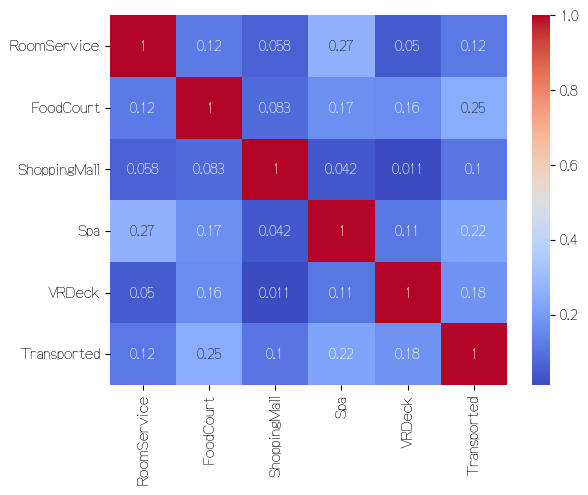

In [181]:
spend_df = train_df[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck','Transported']]
spend_df1 = spend_df[(spend_df['RoomService']>0)&(spend_df['FoodCourt']>0)&(spend_df['ShoppingMall']>0)&(spend_df['Spa']>0)&(spend_df['VRDeck']>0)]
sns.heatmap(spend_df1.corr().abs(), annot=True,cmap = 'coolwarm')


In [182]:
# list1 = train_df[(train_df['Spa']>train_df['Spa'].dropna().mean()) & (train_df['RoomService'].isna()==True)].index.to_list()
# for i in list1:
#     train_df.loc[i,'RoomService']=train_df[train_df['Spa']>train_df['Spa'].dropna().mean()]['RoomService'].dropna().mean()
# list1 = test_df[(test_df['Spa']>test_df['Spa'].dropna().mean()) & (test_df['RoomService'].isna()==True)].index.to_list()
# for i in list1:
#     test_df.loc[i,'RoomService']=test_df[test_df['Spa']>test_df['Spa'].dropna().mean()]['RoomService'].dropna().mean()

# list1 = train_df[(train_df['RoomService']>train_df['RoomService'].dropna().mean()) & (train_df['Spa'].isna()==True)].index.to_list()
# for i in list1:
#     train_df.loc[i,'Spa']=train_df[train_df['RoomService']>train_df['RoomService'].dropna().mean()]['Spa'].dropna().mean()
# list1 = test_df[(test_df['Spa']>test_df['Spa'].dropna().mean()) & (test_df['RoomService'].isna()==True)].index.to_list()
# for i in list1:
#     test_df.loc[i,'Spa']=test_df[test_df['RoomService']>test_df['RoomService'].dropna().mean()]['Spa'].dropna().mean()
  

In [183]:
# 清除部份Age缺失值
train_df.loc[train_df[(train_df['RoomService']>train_df['RoomService'].dropna().mean()) & (train_df['Age'].isna()==True)].index,'Age']=train_df[train_df['RoomService']>train_df['RoomService'].dropna().mean()]['Age'].mode()[0]
test_df.loc[test_df[(test_df['RoomService']>test_df['RoomService'].dropna().mean()) & (test_df['Age'].isna()==True)].index,'Age']=test_df[test_df['RoomService']>test_df['RoomService'].dropna().mean()]['Age'].mode()[0]
train_df.loc[train_df[(train_df['FoodCourt']>train_df['FoodCourt'].dropna().mean()) & (train_df['Age'].isna()==True)].index,'Age']=train_df[train_df['FoodCourt']>train_df['FoodCourt'].dropna().mean()]['Age'].mode()[0]
test_df.loc[test_df[(test_df['FoodCourt']>test_df['FoodCourt'].dropna().mean()) & (test_df['Age'].isna()==True)].index,'Age']=test_df[test_df['FoodCourt']>test_df['FoodCourt'].dropna().mean()]['Age'].mode()[0]
train_df.loc[train_df[(train_df['ShoppingMall']>train_df['ShoppingMall'].dropna().mean()) & (train_df['Age'].isna()==True)].index,'Age']=train_df[train_df['ShoppingMall']>train_df['ShoppingMall'].dropna().mean()]['Age'].mode()[0]
test_df.loc[test_df[(test_df['ShoppingMall']>test_df['ShoppingMall'].dropna().mean()) & (test_df['Age'].isna()==True)].index,'Age']=test_df[test_df['ShoppingMall']>test_df['ShoppingMall'].dropna().mean()]['Age'].mode()[0]
train_df.loc[train_df[(train_df['Spa']>train_df['Spa'].dropna().mean()) & (train_df['Age'].isna()==True)].index,'Age']=train_df[train_df['Spa']>train_df['Spa'].dropna().mean()]['Age'].mode()[0]
test_df.loc[test_df[(test_df['Spa']>test_df['Spa'].dropna().mean()) & (test_df['Age'].isna()==True)].index,'Age']=test_df[test_df['Spa']>test_df['Spa'].dropna().mean()]['Age'].mode()[0]
train_df.loc[train_df[(train_df['VRDeck']>train_df['VRDeck'].dropna().mean()) & (train_df['Age'].isna()==True)].index,'Age']=train_df[train_df['VRDeck']>train_df['VRDeck'].dropna().mean()]['Age'].mode()[0]
test_df.loc[test_df[(test_df['VRDeck']>test_df['VRDeck'].dropna().mean()) & (test_df['Age'].isna()==True)].index,'Age']=test_df[test_df['VRDeck']>test_df['VRDeck'].dropna().mean()]['Age'].mode()[0]


In [184]:
imputer_cols = ["Age", "FoodCourt", "ShoppingMall", "Spa", "VRDeck" ,"RoomService"]
imputer = SimpleImputer(strategy='median' )
imputer.fit(train_df[imputer_cols])
train_df[imputer_cols] = imputer.transform(train_df[imputer_cols])
test_df[imputer_cols] = imputer.transform(test_df[imputer_cols])


In [185]:
# 清理假死狀態
train_df.loc[train_df[(train_df['CryoSleep'].isna()==True)&(train_df['Spend']>0)].index,'CryoSleep']=False
test_df.loc[test_df[(test_df['CryoSleep'].isna()==True)&(test_df['Spend']>0)].index,'CryoSleep']=False

# list1 = train_df[(train_df['CryoSleep'].isna()==True)&(train_df['Spend']==0)].index.to_list()
# train_df.loc[list1,'CryoSleep'] = True
# list1 = test_df[(test_df['CryoSleep'].isna()==True)&(test_df['Spend']==0)].index.to_list()
# test_df.loc[list1,'CryoSleep'] = True

In [186]:
# 清理 VIP
list1 = train_df[(train_df['VIP'].isna()==True)&(train_df['Spend']>train_df[train_df['VIP'].isna()!=True]['Spend'].median())].index.to_list()
train_df.loc[list1,'VIP'] = True
list1 = test_df[(test_df['VIP'].isna()==True)&(test_df['Spend']>test_df[test_df['VIP'].isna()!=True]['Spend'].median())].index.to_list()
test_df.loc[list1,'VIP'] = True

list1 = train_df[(train_df['VIP'].isna()==True)].index.to_list()
train_df.loc[list1,'VIP'] = False
list1 = test_df[(test_df['VIP'].isna()==True)].index.to_list()
test_df.loc[list1,'VIP'] = False

list1 = train_df[(train_df['HomePlanet']=='Earth')&(train_df['VIP']==True)].index.to_list()
train_df.loc[list1,'VIP'] = False
list1 = test_df[(test_df['HomePlanet']=='Earth')&(test_df['VIP']==True)].index.to_list()
test_df.loc[list1,'VIP'] = False

In [187]:
train_df.groupby(['HomePlanet','Destination'])['Spend'].median()

HomePlanet  Destination  
Earth       55 Cancri e       642.0
            PSO J318.5-22       0.0
            TRAPPIST-1e       770.0
Europa      55 Cancri e         0.0
            PSO J318.5-22      44.0
            TRAPPIST-1e      2163.5
Mars        55 Cancri e       805.0
            PSO J318.5-22     895.5
            TRAPPIST-1e       954.0
Name: Spend, dtype: float64

In [188]:
# # 清理 Destination
# # Europa
# # train_df[(train_df['HomePlanet']=='Europa')&(train_df['Destination'].isna()==True)&(train_df['Spend']>train_df[(train_df['HomePlanet']=='Europa')&(train_df['Destination']=='TRAPPIST-1e')].median())]
# list1 = train_df[(train_df['HomePlanet']=='Europa')&(train_df['Destination'].isna()==True)&(train_df['Spend']>
#                     train_df[(train_df['HomePlanet']=='Europa')&(train_df['Destination']=='TRAPPIST-1e')]['Spend'].median())].index.to_list()
# train_df.loc[list1,'Destination'] = 'TRAPPIST-1e'
# list1 = train_df[(train_df['HomePlanet']=='Europa')&(train_df['Destination'].isna()==True)&(train_df['Spend']>
#                     train_df[(train_df['HomePlanet']=='Europa')&(train_df['Destination']=='PSO J318.5-22')]['Spend'].median())].index.to_list()
# train_df.loc[list1,'Destination'] = 'PSO J318.5-22'
# list1 = train_df[(train_df['HomePlanet']=='Europa')&(train_df['Destination'].isna()==True)].index.to_list()
# train_df.loc[list1,'Destination'] = '55 Cancri e'

# list1 = test_df[(train_df['HomePlanet']=='Europa')&(test_df['Destination'].isna()==True)&(test_df['Spend']>
#                     test_df[(test_df['HomePlanet']=='Europa')&(test_df['Destination']=='TRAPPIST-1e')]['Spend'].median())].index.to_list()
# test_df.loc[list1,'Destination'] = 'TRAPPIST-1e'
# list1 = test_df[(test_df['HomePlanet']=='Europa')&(test_df['Destination'].isna()==True)&(test_df['Spend']>
#                     test_df[(test_df['HomePlanet']=='Europa')&(test_df['Destination']=='PSO J318.5-22')]['Spend'].median())].index.to_list()
# test_df.loc[list1,'Destination'] = 'PSO J318.5-22'
# list1 = test_df[(test_df['HomePlanet']=='Europa')&(test_df['Destination'].isna()==True)].index.to_list()
# test_df.loc[list1,'Destination'] = '55 Cancri e'

# # Mars
# list1 = train_df[(train_df['HomePlanet']=='Mars')&(train_df['Destination'].isna()==True)&(train_df['Spend']>
#                     train_df[(train_df['HomePlanet']=='Mars')&(train_df['Destination']=='TRAPPIST-1e')]['Spend'].median())].index.to_list()
# train_df.loc[list1,'Destination'] = 'TRAPPIST-1e'
# list1 = train_df[(train_df['HomePlanet']=='Mars')&(train_df['Destination'].isna()==True)&(train_df['Spend']>
#                     train_df[(train_df['HomePlanet']=='Mars')&(train_df['Destination']=='PSO J318.5-22')]['Spend'].median())].index.to_list()
# train_df.loc[list1,'Destination'] = 'PSO J318.5-22'
# list1 = train_df[(train_df['HomePlanet']=='Mars')&(train_df['Destination'].isna()==True)].index.to_list()
# train_df.loc[list1,'Destination'] = '55 Cancri e'

# list1 = test_df[(train_df['HomePlanet']=='Mars')&(test_df['Destination'].isna()==True)&(test_df['Spend']>
#                     test_df[(test_df['HomePlanet']=='Mars')&(test_df['Destination']=='TRAPPIST-1e')]['Spend'].median())].index.to_list()
# test_df.loc[list1,'Destination'] = 'TRAPPIST-1e'
# list1 = test_df[(test_df['HomePlanet']=='Mars')&(test_df['Destination'].isna()==True)&(test_df['Spend']>
#                     test_df[(test_df['HomePlanet']=='Mars')&(test_df['Destination']=='PSO J318.5-22')]['Spend'].median())].index.to_list()
# test_df.loc[list1,'Destination'] = 'PSO J318.5-22'
# list1 = test_df[(test_df['HomePlanet']=='Mars')&(test_df['Destination'].isna()==True)].index.to_list()
# test_df.loc[list1,'Destination'] = '55 Cancri e'

# # Earth
# list1 = train_df[(train_df['HomePlanet']=='Earth')&(train_df['Destination'].isna()==True)&(train_df['Spend']>
#                     train_df[(train_df['HomePlanet']=='Earth')&(train_df['Destination']=='TRAPPIST-1e')]['Spend'].median())].index.to_list()
# train_df.loc[list1,'Destination'] = 'TRAPPIST-1e'
# list1 = train_df[(train_df['HomePlanet']=='Earth')&(train_df['Destination'].isna()==True)&(train_df['Spend']>
#                     train_df[(train_df['HomePlanet']=='Earth')&(train_df['Destination']=='55 Cancri e')]['Spend'].median())].index.to_list()
# train_df.loc[list1,'Destination'] = '55 Cancri e'
# list1 = train_df[(train_df['HomePlanet']=='Earth')&(train_df['Destination'].isna()==True)].index.to_list()
# train_df.loc[list1,'Destination'] = 'PSO J318.5-22'

# list1 = test_df[(train_df['HomePlanet']=='Earth')&(test_df['Destination'].isna()==True)&(test_df['Spend']>
#                     test_df[(test_df['HomePlanet']=='Earth')&(test_df['Destination']=='TRAPPIST-1e')]['Spend'].median())].index.to_list()
# test_df.loc[list1,'Destination'] = 'TRAPPIST-1e'
# list1 = test_df[(test_df['HomePlanet']=='Earth')&(test_df['Destination'].isna()==True)&(test_df['Spend']>
#                     test_df[(test_df['HomePlanet']=='Earth')&(test_df['Destination']=='55 Cancri e')]['Spend'].median())].index.to_list()
# test_df.loc[list1,'Destination'] = '55 Cancri e'
# list1 = test_df[(test_df['HomePlanet']=='Earth')&(test_df['Destination'].isna()==True)].index.to_list()
# test_df.loc[list1,'Destination'] = 'PSO J318.5-22'

In [189]:
train_df[train_df['Destination']=='TRAPPIST-1e']['HomePlanet'].mode()[0]

'Earth'

In [190]:
# 清理 HomePlanet/Destination
train_df.loc[train_df[(train_df['HomePlanet'].isna()==True)&(train_df['Destination']=='TRAPPIST-1e')].index,['HomePlanet']]=train_df[train_df['Destination']=='TRAPPIST-1e']['HomePlanet'].mode()[0]
test_df.loc[test_df[(test_df['HomePlanet'].isna()==True)&(test_df['Destination']=='TRAPPIST-1e')].index,['HomePlanet']]=test_df[test_df['Destination']=='TRAPPIST-1e']['HomePlanet'].mode()[0]
train_df.loc[train_df[(train_df['HomePlanet'].isna()==True)&(train_df['Destination']=='PSO J318.5-22')].index,['HomePlanet']]=train_df[train_df['Destination']=='PSO J318.5-22']['HomePlanet'].mode()[0]
test_df.loc[test_df[(test_df['HomePlanet'].isna()==True)&(test_df['Destination']=='PSO J318.5-22')].index,['HomePlanet']]=test_df[test_df['Destination']=='PSO J318.5-22']['HomePlanet'].mode()[0]
train_df.loc[train_df[(train_df['HomePlanet'].isna()==True)&(train_df['Destination']=='55 Cancri e')].index,['HomePlanet']]=train_df[train_df['Destination']=='55 Cancri e']['HomePlanet'].mode()[0]
test_df.loc[test_df[(test_df['HomePlanet'].isna()==True)&(test_df['Destination']=='55 Cancri e')].index,['HomePlanet']]=test_df[test_df['Destination']=='55 Cancri e']['HomePlanet'].mode()[0]


train_df.loc[train_df[(train_df['Destination'].isna()==True)&(train_df['HomePlanet']=='Europa')].index,['Destination']]=train_df[train_df['HomePlanet']=='Europa']['Destination'].mode()[0]
test_df.loc[test_df[(test_df['Destination'].isna()==True)&(test_df['HomePlanet']=='Europa')].index,['Destination']]=test_df[test_df['HomePlanet']=='Europa']['Destination'].mode()[0]
train_df.loc[train_df[(train_df['Destination'].isna()==True)&(train_df['HomePlanet']=='Mars')].index,['Destination']]=train_df[train_df['HomePlanet']=='Mars']['Destination'].mode()[0]
test_df.loc[test_df[(test_df['Destination'].isna()==True)&(test_df['HomePlanet']=='Mars')].index,['Destination']]=test_df[test_df['HomePlanet']=='Mars']['Destination'].mode()[0]
train_df.loc[train_df[(train_df['Destination'].isna()==True)&(train_df['HomePlanet']=='Earth')].index,['Destination']]=train_df[train_df['HomePlanet']=='Earth']['Destination'].mode()[0]
test_df.loc[test_df[(test_df['Destination'].isna()==True)&(test_df['HomePlanet']=='Earth')].index,['Destination']]=test_df[test_df['HomePlanet']=='Earth']['Destination'].mode()[0]

train_df.loc[train_df[(train_df['CryoSleep'].isna()==True)].index,['CryoSleep']]=train_df['CryoSleep'].mode()[0]
test_df.loc[test_df[(test_df['CryoSleep'].isna()==True)].index,['CryoSleep']]=test_df['CryoSleep'].mode()[0]

train_df['HomePlanet'].fillna(value=train_df['HomePlanet'].mode()[0],inplace=True)
test_df['HomePlanet'].fillna(value=test_df['HomePlanet'].mode()[0],inplace=True)
train_df['Destination'].fillna(value=train_df['Destination'].mode()[0],inplace=True)
test_df['Destination'].fillna(value=test_df['Destination'],inplace=True)
train_df['CryoSleep'].fillna(method='ffill',inplace=True)
test_df['CryoSleep'].fillna(method='ffill',inplace=True)


In [191]:
train_df[(train_df['HomePlanet'].isna()==True)]

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,ID1,ID2,family_size,Deck,Cabin_num,Side,Spend


,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,ID1,ID2,family_size,Deck,Cabin_num,Side,Spend
1980,2117_01,Europa,False,TRAPPIST-1e,31.0,False,0.0,8718.0,0.0,13036.0,267.0,Azet Rocketedy,False,2117,01,1,NaN,NaN,NaN,22021.0
2828,3053_01,Europa,False,55 Cancri e,52.0,False,0.0,2.0,0.0,10976.0,810.0,Ainor Fuelisent,False,3053,01,1,NaN,NaN,NaN,11788.0
5131,5480_01,Europa,False,TRAPPIST-1e,37.0,False,31.0,9307.0,0.0,904.0,11213.0,Avijava Ellcefulve,False,5480,01,1,NaN,NaN,NaN,21455.0


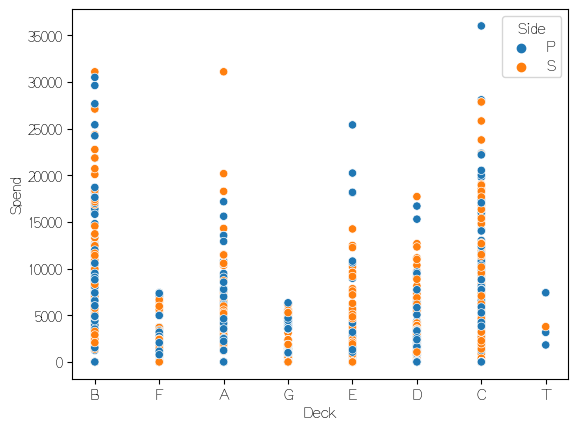

In [192]:
sns.scatterplot(x='Deck',y='Spend',hue='Side',data=train_df);
train_df[(train_df['Deck'].isna()==True)&(train_df['Spend']>10000)]

In [193]:
# 依消費等級清除Cabin 缺失值
list1 = train_df[train_df['Deck'].isnull()].index.tolist()
for i in list1:
    for j in range(len(train_df)):
        if ((train_df.loc[j,'HomePlanet'] == train_df.loc[i,'HomePlanet']) and (train_df.loc[j,'Spend'] < (train_df.loc[i,'Spend']*1.05)) and (train_df.loc[j,'Spend'] > (train_df.loc[i,'Spend']*0.95))):
            train_df.loc[i,'Deck'] = train_df.loc[j,'Deck']
            train_df.loc[i,'Cabin_num'] = train_df.loc[j,'Cabin_num']
            train_df.loc[i,'Side'] = train_df.loc[j,'Side']
            break
list1 = test_df[test_df['Deck'].isnull()].index.tolist()
for i in list1:
    for j in range(len(test_df)):
        if ((test_df.loc[j,'HomePlanet'] == test_df.loc[i,'HomePlanet']) and (test_df.loc[j,'Spend'] < (test_df.loc[i,'Spend']*1.05)) and (test_df.loc[j,'Spend'] > (test_df.loc[i,'Spend']*0.95))):
            test_df.loc[i,'Deck'] = test_df.loc[j,'Deck']
            test_df.loc[i,'Cabin_num'] = test_df.loc[j,'Cabin_num']
            test_df.loc[i,'Side'] = test_df.loc[j,'Side']
            break

list1 = train_df[train_df['Deck'].isnull()].index.tolist()
for i in list1:
    for j in range(len(train_df)):
        if ((train_df.loc[j,'Destination'] == train_df.loc[i,'Destination']) and (train_df.loc[j,'Spend'] < (train_df.loc[i,'Spend']*1.05)) and (train_df.loc[j,'Spend'] > (train_df.loc[i,'Spend']*0.95))):
            train_df.loc[i,'Deck'] = train_df.loc[j,'Deck']
            train_df.loc[i,'Cabin_num'] = train_df.loc[j,'Cabin_num']
            train_df.loc[i,'Side'] = train_df.loc[j,'Side']
            break
list1 = test_df[test_df['Deck'].isnull()].index.tolist()
for i in list1:
    for j in range(len(test_df)):
        if ((test_df.loc[j,'Destination'] == test_df.loc[i,'Destination']) and (test_df.loc[j,'Spend'] < (test_df.loc[i,'Spend']*1.05)) and (test_df.loc[j,'Spend'] > (test_df.loc[i,'Spend']*0.95))):
            test_df.loc[i,'Deck'] = test_df.loc[j,'Deck']
            test_df.loc[i,'Cabin_num'] = test_df.loc[j,'Cabin_num']
            test_df.loc[i,'Side'] = test_df.loc[j,'Side']
            break

In [194]:
print(train_df.isnull().sum())
print('='*30)
print(test_df.isnull().sum())

PassengerId       0
HomePlanet        0
CryoSleep         0
Destination       0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name            104
Transported       0
ID1               0
ID2               0
family_size       0
Deck             45
Cabin_num        45
Side             45
Spend             0
dtype: int64
PassengerId      0
HomePlanet       0
CryoSleep        0
Destination      0
Age              0
VIP              0
RoomService      0
FoodCourt        0
ShoppingMall     0
Spa              0
VRDeck           0
Name            53
ID1              0
ID2              0
family_size      0
Deck            24
Cabin_num       24
Side            24
Spend            0
dtype: int64


In [195]:
train_df['Deck'].fillna(method='ffill', inplace=True)
train_df['Cabin_num'].fillna(method='ffill', inplace=True)
train_df['Side'].fillna(method='ffill', inplace=True)
test_df['Deck'].fillna(method='ffill', inplace=True)
test_df['Cabin_num'].fillna(method='ffill', inplace=True)
test_df['Side'].fillna(method='ffill', inplace=True)

In [196]:
train_df.tail()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,ID1,ID2,family_size,Deck,Cabin_num,Side,Spend
8688,9276_01,Europa,False,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,9276,01,1,A,98,P,8536.0
8689,9278_01,Earth,True,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,9278,01,1,G,1499,S,0.0
8690,9279_01,Earth,False,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,9279,01,1,G,1500,S,1873.0
8691,9280_01,Europa,False,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,9280,01,2,E,608,S,4637.0
8692,9280_02,Europa,False,TRAPPIST-1e,44.0,False,126.0,4688.0,0.0,0.0,12.0,Propsh Hontichre,True,9280,02,2,E,608,S,4826.0


In [197]:
train_df['Spend'] = train_df['RoomService']+train_df['FoodCourt']+train_df['ShoppingMall']+train_df['Spa']+train_df['VRDeck']
test_df['Spend'] = test_df['RoomService']+test_df['FoodCourt']+test_df['ShoppingMall']+test_df['Spa']+test_df['VRDeck']
print("Train missing values: \n", train_df.isna().sum())
print("Test missing values: \n",test_df.isna().sum())

Train missing values: 
 PassengerId       0
HomePlanet        0
CryoSleep         0
Destination       0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name            104
Transported       0
ID1               0
ID2               0
family_size       0
Deck              0
Cabin_num         0
Side              0
Spend             0
dtype: int64
Test missing values: 
 PassengerId      0
HomePlanet       0
CryoSleep        0
Destination      0
Age              0
VIP              0
RoomService      0
FoodCourt        0
ShoppingMall     0
Spa              0
VRDeck           0
Name            53
ID1              0
ID2              0
family_size      0
Deck             0
Cabin_num        0
Side             0
Spend            0
dtype: int64


特徵分析
* CryoSleep 冷凍睡眠的與否可能影響傳送
* HomePlanet/ Destination 可能分佈不同艙位影響傳送
* VIP 是否傳送可能性較大
* VRDeck 先觀察到危機可能性
* PassengerId/Name 家族成員可能性

In [198]:
# VIP 與 Transported 的關係，越不會被傳送
train_df[['VIP', 'Transported']].groupby(['VIP'], as_index=False).mean().sort_values(by='Transported', ascending=False)

,VIP,Transported
0,False,0.507336
1,True,0.373444


In [199]:
# HomePlanet 與 Transported 的關係
print(train_df['HomePlanet'].unique())
train_df[['HomePlanet', 'Transported']].groupby(['HomePlanet'], as_index=False).mean().sort_values(by='Transported', ascending=False)

['Europa' 'Earth' 'Mars']


,HomePlanet,Transported
1,Europa,0.660698
2,Mars,0.523223
0,Earth,0.423858


In [200]:
# Destination 與 Transported 的關係
print(train_df['Destination'].unique())
train_df[['Destination', 'Transported']].groupby(['Destination'], as_index=False).mean().sort_values(by='Transported', ascending=False)

['TRAPPIST-1e' 'PSO J318.5-22' '55 Cancri e']


,Destination,Transported
0,55 Cancri e,0.610000
1,PSO J318.5-22,0.503769
2,TRAPPIST-1e,0.472199


In [201]:
train_df[['HomePlanet', 'Destination', 'Transported']].groupby(['HomePlanet', 'Destination'], as_index=False).mean().sort_values(by='Transported', ascending=False)

,HomePlanet,Destination,Transported
4,Europa,PSO J318.5-22,0.736842
3,Europa,55 Cancri e,0.692308
5,Europa,TRAPPIST-1e,0.636509
6,Mars,55 Cancri e,0.608247
8,Mars,TRAPPIST-1e,0.515230
0,Earth,55 Cancri e,0.502874
1,Earth,PSO J318.5-22,0.502063
7,Mars,PSO J318.5-22,0.440000
2,Earth,TRAPPIST-1e,0.390015


In [202]:
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,ID1,ID2,family_size,Deck,Cabin_num,Side,Spend
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0001,01,1,B,0,P,0.0
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0002,01,1,F,0,S,736.0
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0003,01,2,A,0,S,10383.0
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0003,02,2,A,0,S,5176.0
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,0004,01,1,F,1,S,1091.0


In [203]:
train_df[['Deck', 'Side', 'Transported']].groupby(['Deck', 'Side'], as_index=False).mean().sort_values(by='Transported', ascending=False)

,Deck,Side,Transported
3,B,S,0.782313
5,C,S,0.761446
2,B,P,0.672176
4,C,P,0.582133
13,G,S,0.581679
1,A,S,0.541096
11,F,S,0.467824
7,D,S,0.461864
12,G,P,0.449808
0,A,P,0.447154


In [204]:
train_df[['Deck', 'VIP', 'Spend']].groupby(['Deck', 'VIP'], as_index=False).mean().sort_values(by='Spend', ascending=False)

,Deck,VIP,Spend
3,B,True,6900.565217
5,C,True,6295.309091
1,A,True,5004.710526
13,T,False,4716.400000
4,C,False,3915.128713
0,A,False,3080.259740
2,B,False,2692.654354
7,D,True,2549.243902
6,D,False,2272.687361
9,E,True,2097.875000


針對連續型特徵採取可視化分析

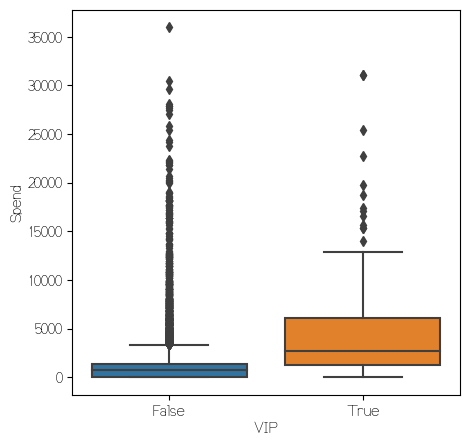

In [205]:
fig = plt.figure(figsize=(5, 5))
sns.boxplot(x='VIP', y='Spend', data=train_df)
plt.show()

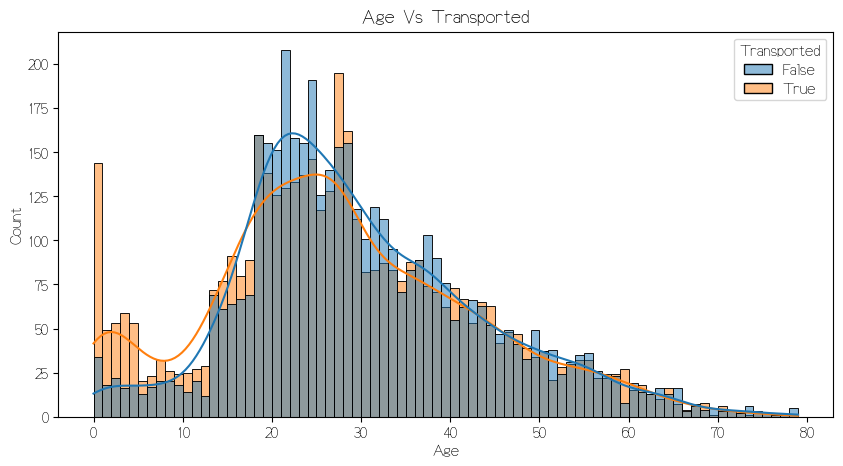

In [206]:
# Age 對 Transported 的關係
fig = plt.figure(figsize=(10, 5))
sns.histplot(data=train_df, x='Age', hue='Transported', binwidth=1, kde=True)
plt.title('Age Vs Transported')
plt.xticks([x for x in range(0, 90, 10)])
plt.xlabel('Age');

數據清理

In [207]:
train_df1 = train_df.copy()
test_df1 = test_df.copy()

In [208]:
train_df = train_df1.copy()
test_df = test_df1.copy()

In [209]:
# 刪除無用特徵
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,ID1,ID2,family_size,Deck,Cabin_num,Side,Spend
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0001,01,1,B,0,P,0.0
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0002,01,1,F,0,S,736.0
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0003,01,2,A,0,S,10383.0
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0003,02,2,A,0,S,5176.0
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,0004,01,1,F,1,S,1091.0


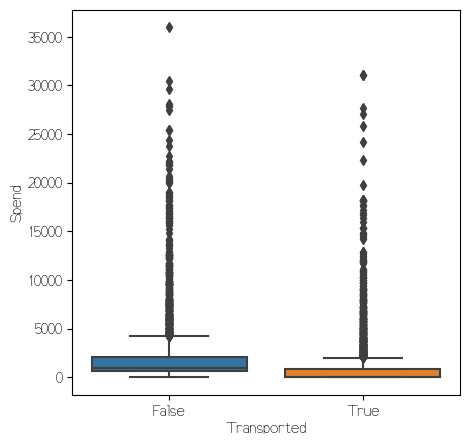

In [210]:
fig = plt.figure(figsize=(5, 5))
sns.boxplot(x='Transported', y='Spend', data=train_df)
plt.show()

In [211]:
s1 = train_df[train_df['VRDeck'] >0]
s1.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,family_size,Spend
count,3010.000000,3010.000000,3010.000000,3010.000000,3010.000000,3010.000000,3010.000000,3010.000000
mean,32.113289,281.280066,1064.497010,237.890033,673.255150,861.392027,1.850831,3118.314286
std,12.543184,766.691226,2410.169133,819.030227,1729.303797,1797.300831,1.451329,3942.253397
min,13.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,10.000000
25%,23.000000,0.000000,0.000000,0.000000,0.000000,28.000000,1.000000,808.000000
50%,29.000000,1.000000,53.000000,0.000000,30.000000,260.000000,1.000000,1500.000000
75%,40.000000,173.750000,880.750000,122.750000,544.000000,806.500000,2.000000,3861.000000
max,79.000000,9920.000000,29813.000000,23492.000000,22408.000000,24133.000000,8.000000,35987.000000


In [212]:
print(s1['FoodCourt'].median())


53.0


In [213]:
# 消費 分Bin
# RoomService
train_df.loc[((train_df['RoomService'] > 0) & (train_df['RoomService'] <= 37)), 'RoomService'] = 1
train_df.loc[((train_df['RoomService'] > 37) & (train_df['RoomService'] <= 320)), 'RoomService'] = 2
train_df.loc[((train_df['RoomService'] > 320) & (train_df['RoomService'] <= 848)), 'RoomService'] = 3
train_df.loc[train_df['RoomService'] > 848, 'RoomService'] = 4

test_df.loc[((test_df['RoomService'] > 0) & (test_df['RoomService'] <= 37)), 'RoomService'] = 1
test_df.loc[((test_df['RoomService'] > 37) & (test_df['RoomService'] <= 320)), 'RoomService'] = 2
test_df.loc[((test_df['RoomService'] > 320) & (test_df['RoomService'] <= 848)), 'RoomService'] = 3
test_df.loc[test_df['RoomService'] > 848, 'RoomService'] = 4

# FoodCourt
train_df.loc[((train_df['FoodCourt'] > 0) & (train_df['FoodCourt'] <= 39)), 'FoodCourt'] = 1
train_df.loc[((train_df['FoodCourt'] > 39) & (train_df['FoodCourt'] <= 396.5)), 'FoodCourt'] = 2
train_df.loc[((train_df['FoodCourt'] > 396.5) & (train_df['FoodCourt'] <= 1255.75)), 'FoodCourt'] = 3
train_df.loc[train_df['FoodCourt'] > 1255.75, 'FoodCourt'] = 4

test_df.loc[((test_df['FoodCourt'] > 0) & (test_df['FoodCourt'] <= 39)), 'FoodCourt'] = 1
test_df.loc[((test_df['FoodCourt'] > 39) & (test_df['FoodCourt'] <= 396.5)), 'FoodCourt'] = 2
test_df.loc[((test_df['FoodCourt'] > 396.5) & (test_df['FoodCourt'] <= 1255.75)), 'FoodCourt'] = 3
test_df.loc[test_df['FoodCourt'] > 1255.75, 'FoodCourt'] = 4

# ShoppingMall
train_df.loc[((train_df['ShoppingMall'] > 0) & (train_df['ShoppingMall'] <= 22)), 'ShoppingMall'] = 1
train_df.loc[((train_df['ShoppingMall'] > 22) & (train_df['ShoppingMall'] <= 195)), 'ShoppingMall'] = 2
train_df.loc[((train_df['ShoppingMall'] > 195) & (train_df['ShoppingMall'] <= 693)), 'ShoppingMall'] = 3
train_df.loc[train_df['ShoppingMall'] > 693, 'ShoppingMall'] = 4

test_df.loc[((test_df['ShoppingMall'] > 0) & (test_df['ShoppingMall'] <= 22)), 'ShoppingMall'] = 1
test_df.loc[((test_df['ShoppingMall'] > 22) & (test_df['ShoppingMall'] <= 195)), 'ShoppingMall'] = 2
test_df.loc[((test_df['ShoppingMall'] > 195) & (test_df['ShoppingMall'] <= 693)), 'ShoppingMall'] = 3
test_df.loc[test_df['ShoppingMall'] > 693, 'ShoppingMall'] = 4

# Spa
train_df.loc[((train_df['Spa'] > 0) & (train_df['Spa'] <= 27)), 'Spa'] = 1
train_df.loc[((train_df['Spa'] > 27) & (train_df['Spa'] <= 226.5)), 'Spa'] = 2
train_df.loc[((train_df['Spa'] > 226.5) & (train_df['Spa'] <= 769)), 'Spa'] = 3
train_df.loc[train_df['Spa'] > 769, 'Spa'] = 4

test_df.loc[((test_df['Spa'] > 0) & (test_df['Spa'] <= 27)), 'Spa'] = 1
test_df.loc[((test_df['Spa'] > 27) & (test_df['Spa'] <= 226.5)), 'Spa'] = 2
test_df.loc[((test_df['Spa'] > 226.5) & (test_df['Spa'] <= 769)), 'Spa'] = 3
test_df.loc[test_df['Spa'] > 769, 'Spa'] = 4

# VRDeck
train_df.loc[((train_df['VRDeck'] > 0) & (train_df['VRDeck'] <= 28)), 'VRDeck'] = 1
train_df.loc[((train_df['VRDeck'] > 28) & (train_df['VRDeck'] <= 260)), 'VRDeck'] = 2
train_df.loc[((train_df['VRDeck'] > 260) & (train_df['VRDeck'] <= 806.5)), 'VRDeck'] = 3
train_df.loc[train_df['VRDeck'] > 806.5, 'VRDeck'] = 4

test_df.loc[((test_df['VRDeck'] > 0) & (test_df['VRDeck'] <= 28)), 'VRDeck'] = 1
test_df.loc[((test_df['VRDeck'] > 28) & (test_df['VRDeck'] <= 260)), 'VRDeck'] = 2
test_df.loc[((test_df['VRDeck'] > 260) & (test_df['VRDeck'] <= 806.5)), 'VRDeck'] = 3
test_df.loc[test_df['VRDeck'] > 806.5, 'VRDeck'] = 4



In [214]:
# from sklearn.preprocessing import OneHotEncoder
# ohe = OneHotEncoder()
# train_df['RoomService'] = train_df['RoomService'].astype(str)
# train_df['FoodCourt'] = train_df['FoodCourt'].astype(str)
# train_df['ShoppingMall'] = train_df['ShoppingMall'].astype(str)
# train_df['Spa'] = train_df['Spa'].astype(str)
# train_df['VRDeck'] = train_df['VRDeck'].astype(str)
# test_df['RoomService'] = test_df['RoomService'].astype(str)
# test_df['FoodCourt'] = test_df['FoodCourt'].astype(str)
# test_df['ShoppingMall'] = test_df['ShoppingMall'].astype(str)
# test_df['Spa'] = test_df['Spa'].astype(str)
# test_df['VRDeck'] = test_df['VRDeck'].astype(str)

# X2 = ohe.fit_transform(train_df[['RoomService']].values).toarray()
# home_list = ['is_' + item for item in np.sort(train_df['RoomService'].unique())]
# df2 = pd.DataFrame(X2, columns=home_list)
# train_df = pd.concat((train_df.drop('RoomService', axis=1), df2), axis=1)

# X2 = ohe.transform(test_df[['RoomService']].values).toarray()
# home_list = ['is_' + item for item in np.sort(test_df['RoomService'].unique())]
# df2 = pd.DataFrame(X2, columns=home_list)
# test_df = pd.concat((test_df.drop('RoomService', axis=1), df2), axis=1)

# X2 = ohe.fit_transform(train_df[['FoodCourt']].values).toarray()
# home_list = ['is_' + item for item in np.sort(train_df['FoodCourt'].unique())]
# df2 = pd.DataFrame(X2, columns=home_list)
# train_df = pd.concat((train_df.drop('FoodCourt', axis=1), df2), axis=1)

# X2 = ohe.transform(test_df[['FoodCourt']].values).toarray()
# home_list = ['is_' + item for item in np.sort(test_df['FoodCourt'].unique())]
# df2 = pd.DataFrame(X2, columns=home_list)
# test_df = pd.concat((test_df.drop('FoodCourt', axis=1), df2), axis=1)


# X2 = ohe.fit_transform(train_df[['ShoppingMall']].values).toarray()
# home_list = ['is_' + item for item in np.sort(train_df['ShoppingMall'].unique())]
# df2 = pd.DataFrame(X2, columns=home_list)
# train_df = pd.concat((train_df.drop('ShoppingMall', axis=1), df2), axis=1)

# X2 = ohe.transform(test_df[['ShoppingMall']].values).toarray()
# home_list = ['is_' + item for item in np.sort(test_df['ShoppingMall'].unique())]
# df2 = pd.DataFrame(X2, columns=home_list)
# test_df = pd.concat((test_df.drop('ShoppingMall', axis=1), df2), axis=1)

# X2 = ohe.fit_transform(train_df[['Spa']].values).toarray()
# home_list = ['is_' + item for item in np.sort(train_df['Spa'].unique())]
# df2 = pd.DataFrame(X2, columns=home_list)
# train_df = pd.concat((train_df.drop('Spa', axis=1), df2), axis=1)

# X2 = ohe.transform(test_df[['Spa']].values).toarray()
# home_list = ['is_' + item for item in np.sort(test_df['Spa'].unique())]
# df2 = pd.DataFrame(X2, columns=home_list)
# test_df = pd.concat((test_df.drop('Spa', axis=1), df2), axis=1)

# X2 = ohe.fit_transform(train_df[['VRDeck']].values).toarray()
# home_list = ['is_' + item for item in np.sort(train_df['VRDeck'].unique())]
# df2 = pd.DataFrame(X2, columns=home_list)
# train_df = pd.concat((train_df.drop('VRDeck', axis=1), df2), axis=1)

# X2 = ohe.transform(test_df[['VRDeck']].values).toarray()
# home_list = ['is_' + item for item in np.sort(test_df['VRDeck'].unique())]
# df2 = pd.DataFrame(X2, columns=home_list)
# test_df = pd.concat((test_df.drop('VRDeck', axis=1), df2), axis=1)

In [215]:
test_df

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,ID1,ID2,family_size,Deck,Cabin_num,Side,Spend
0,0013_01,Earth,True,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,0013,01,1,G,3,S,0.0
1,0018_01,Earth,False,TRAPPIST-1e,19.0,False,0.0,1.0,0.0,4.0,0.0,Lerome Peckers,0018,01,1,F,4,S,2832.0
2,0019_01,Europa,True,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,0019,01,1,C,0,S,0.0
3,0021_01,Europa,False,TRAPPIST-1e,38.0,False,0.0,4.0,0.0,2.0,3.0,Meratz Caltilter,0021,01,1,C,1,S,7418.0
4,0023_01,Earth,False,TRAPPIST-1e,20.0,False,1.0,0.0,3.0,0.0,0.0,Brence Harperez,0023,01,1,F,5,S,645.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter,9266,02,2,G,1496,S,0.0
4273,9269_01,Earth,False,TRAPPIST-1e,42.0,False,0.0,3.0,1.0,1.0,2.0,Matty Scheron,9269,01,1,G,13,P,1018.0
4274,9271_01,Mars,True,55 Cancri e,27.0,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore,9271,01,1,D,296,P,0.0
4275,9273_01,Europa,False,TRAPPIST-1e,27.0,False,0.0,4.0,0.0,0.0,3.0,Kitakan Conale,9273,01,1,D,297,P,3203.0


In [216]:
train_df.drop(['PassengerId','Name','ID1','ID2','Spend'],axis=1,inplace=True)
test_df.drop(['PassengerId','Name','ID1','ID2','Spend'],axis=1,inplace=True)
train_df['Cabin_num'] = train_df['Cabin_num'].astype(int)
test_df['Cabin_num'] = test_df['Cabin_num'].astype(int)
train_df['CryoSleep'] = train_df['CryoSleep'].astype(int)
test_df['CryoSleep'] = test_df['CryoSleep'].astype(int)
train_df['Transported'] = train_df['Transported'].astype(int)

train_df['VIP'] = train_df['VIP'].astype(int)
test_df['VIP'] = test_df['VIP'].astype(int)

In [217]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8693 non-null   object 
 1   CryoSleep     8693 non-null   int32  
 2   Destination   8693 non-null   object 
 3   Age           8693 non-null   float64
 4   VIP           8693 non-null   int32  
 5   RoomService   8693 non-null   float64
 6   FoodCourt     8693 non-null   float64
 7   ShoppingMall  8693 non-null   float64
 8   Spa           8693 non-null   float64
 9   VRDeck        8693 non-null   float64
 10  Transported   8693 non-null   int32  
 11  family_size   8693 non-null   int64  
 12  Deck          8693 non-null   object 
 13  Cabin_num     8693 non-null   int32  
 14  Side          8693 non-null   object 
dtypes: float64(6), int32(4), int64(1), object(4)
memory usage: 883.0+ KB


In [218]:
# Age 分Bin
train_df.loc[train_df['Age'] <= 12, 'Age'] = 0
train_df.loc[((train_df['Age'] > 12) & (train_df['Age'] <= 24)), 'Age'] = 1
train_df.loc[((train_df['Age'] > 24) & (train_df['Age'] <= 36)), 'Age'] = 2
train_df.loc[((train_df['Age'] > 36) & (train_df['Age'] <= 48)), 'Age'] = 3
train_df.loc[((train_df['Age'] > 48) & (train_df['Age'] <= 60)), 'Age'] = 4
train_df.loc[((train_df['Age'] > 60) & (train_df['Age'] <= 72)), 'Age'] = 5
train_df.loc[train_df['Age'] > 72, 'Age'] = 6

test_df.loc[test_df['Age'] <= 12, 'Age'] = 0
test_df.loc[((test_df['Age'] > 12) & (test_df['Age'] <= 24)), 'Age'] = 1
test_df.loc[((test_df['Age'] > 24) & (test_df['Age'] <= 36)), 'Age'] = 2
test_df.loc[((test_df['Age'] > 36) & (test_df['Age'] <= 48)), 'Age'] = 3
test_df.loc[((test_df['Age'] > 48) & (test_df['Age'] <= 60)), 'Age'] = 4
test_df.loc[((test_df['Age'] > 60) & (test_df['Age'] <= 72)), 'Age'] = 5
test_df.loc[test_df['Age'] > 72, 'Age'] = 6

In [219]:
# Cabin_num 分Bin
train_df.loc[train_df['Cabin_num'] <= 250, 'Cabin_num'] = 0
train_df.loc[((train_df['Cabin_num'] > 250) & (train_df['Cabin_num'] <= 500)), 'Cabin_num'] = 1
train_df.loc[((train_df['Cabin_num'] > 500) & (train_df['Cabin_num'] <= 750)), 'Cabin_num'] = 2
train_df.loc[((train_df['Cabin_num'] > 750) & (train_df['Cabin_num'] <= 1000)), 'Cabin_num'] = 3
train_df.loc[((train_df['Cabin_num'] > 1000) & (train_df['Cabin_num'] <= 1250)), 'Cabin_num'] = 4
train_df.loc[((train_df['Cabin_num'] > 1250) & (train_df['Cabin_num'] <= 1500)), 'Cabin_num'] = 5
train_df.loc[((train_df['Cabin_num'] > 1500) & (train_df['Cabin_num'] <= 1750)), 'Cabin_num'] = 6
train_df.loc[train_df['Cabin_num'] > 1750, 'Cabin_num'] = 7

test_df.loc[test_df['Cabin_num'] <= 250, 'Cabin_num'] = 0
test_df.loc[((test_df['Cabin_num'] > 250) & (test_df['Cabin_num'] <= 500)), 'Cabin_num'] = 1
test_df.loc[((test_df['Cabin_num'] > 500) & (test_df['Cabin_num'] <= 750)), 'Cabin_num'] = 2
test_df.loc[((test_df['Cabin_num'] > 750) & (test_df['Cabin_num'] <= 1000)), 'Cabin_num'] = 3
test_df.loc[((test_df['Cabin_num'] > 1000) & (test_df['Cabin_num'] <= 1250)), 'Cabin_num'] = 4
test_df.loc[((test_df['Cabin_num'] > 1250) & (test_df['Cabin_num'] <= 1500)), 'Cabin_num'] = 5
test_df.loc[((test_df['Cabin_num'] > 1500) & (test_df['Cabin_num'] <= 1750)), 'Cabin_num'] = 6
test_df.loc[test_df['Cabin_num'] > 1750, 'Cabin_num'] = 7

One Hot Encoder

In [220]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
# X2 = ohe.fit_transform(train_df[['HomePlanet']].values).toarray()
# # 欄位處理
# home_list = ['is_' + item for item in np.sort(train_df['HomePlanet'].unique())]
# df2 = pd.DataFrame(X2, columns=home_list)
# # 合併
# train_df = pd.concat((train_df.drop('HomePlanet', axis=1), df2), axis=1)

# X2 = ohe.transform(test_df[['HomePlanet']].values).toarray()
# # 欄位處理
# home_list = ['is_' + item for item in np.sort(test_df['HomePlanet'].unique())]
# df2 = pd.DataFrame(X2, columns=home_list)
# # 合併
# test_df = pd.concat((test_df.drop('HomePlanet', axis=1), df2), axis=1)

# X2 = ohe.fit_transform(train_df[['Destination']].values).toarray()
# # 欄位處理
# home_list = ['is_' + item for item in np.sort(train_df['Destination'].unique())]
# df2 = pd.DataFrame(X2, columns=home_list)
# # 合併
# train_df = pd.concat((train_df.drop('Destination', axis=1), df2), axis=1)

# X2 = ohe.transform(test_df[['Destination']].values).toarray()
# # 欄位處理
# home_list = ['is_' + item for item in np.sort(test_df['Destination'].unique())]
# df2 = pd.DataFrame(X2, columns=home_list)
# # 合併
# test_df = pd.concat((test_df.drop('Destination', axis=1), df2), axis=1)

# X2 = ohe.fit_transform(train_df[['Deck']].values).toarray()
# home_list = ['is_' + item for item in np.sort(train_df['Deck'].unique())]
# df2 = pd.DataFrame(X2, columns=home_list)
# train_df = pd.concat((train_df.drop('Deck', axis=1), df2), axis=1)

# X2 = ohe.transform(test_df[['Deck']].values).toarray()
# home_list = ['is_' + item for item in np.sort(test_df['Deck'].unique())]
# df2 = pd.DataFrame(X2, columns=home_list)
# test_df = pd.concat((test_df.drop('Deck', axis=1), df2), axis=1)

* 55 Cancri e       
* PSO J318.5-22
* TRAPPIST-1e

In [221]:
# map Side
train_df['Side'] = train_df['Side'].map({'P':0,'S':1}).astype(np.int8)
test_df['Side'] = test_df['Side'].map({'P':0,'S':1}).astype(np.int8)
train_df['HomePlanet'] = train_df['HomePlanet'].map({'Europa':2,'Earth':0, 'Mars':1}).astype(np.int8)
test_df['HomePlanet'] = test_df['HomePlanet'].map({'Europa':2,'Earth':0, 'Mars':1}).astype(np.int8)
train_df['Destination'] = train_df['Destination'].map({'55 Cancri e':0,'PSO J318.5-22':2, 'TRAPPIST-1e':1}).astype(np.int8)
test_df['Destination'] = test_df['Destination'].map({'55 Cancri e':0,'PSO J318.5-22':2, 'TRAPPIST-1e':1}).astype(np.int8)
train_df['Deck'] = train_df['Deck'].map({'A':0,'B':1,'C':2,'D':3,'E':4,'F':5,'G':6,'T':7}).astype(np.int8)
test_df['Deck'] = test_df['Deck'].map({'A':0,'B':1,'C':2,'D':3,'E':4,'F':5,'G':6,'T':7}).astype(np.int8)


In [222]:
train_df['VIP_C'] = 0
train_df.loc[train_df[(train_df['CryoSleep']==0)& (train_df['VIP']==0)].index,['VIP_C']]=0
train_df.loc[train_df[(train_df['CryoSleep']==0)& (train_df['VIP']==1)].index,['VIP_C']]=1
train_df.loc[train_df[(train_df['CryoSleep']==1)& (train_df['VIP']==0)].index,['VIP_C']]=2
train_df.loc[train_df[(train_df['CryoSleep']==1)& (train_df['VIP']==1)].index,['VIP_C']]=3

test_df['VIP_C'] = 0
test_df.loc[test_df[(test_df['CryoSleep']==0)& (test_df['VIP']==0)].index,['VIP_C']]=0
test_df.loc[test_df[(test_df['CryoSleep']==0)& (test_df['VIP']==1)].index,['VIP_C']]=1
test_df.loc[test_df[(test_df['CryoSleep']==1)& (test_df['VIP']==0)].index,['VIP_C']]=2
test_df.loc[test_df[(test_df['CryoSleep']==1)& (test_df['VIP']==1)].index,['VIP_C']]=3
train_df.drop(['CryoSleep','VIP'], axis=1, inplace=True)
test_df.drop(['CryoSleep','VIP'], axis=1, inplace=True)

### 訓練模型

In [223]:
X_train = train_df.drop("Transported", axis=1)
y_train = train_df["Transported"]
# X_test = test_df.drop("PassengerId", axis=1).copy()

In [224]:
# 標準化（Standardization）
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(test_df)

In [225]:
# 邏輯回歸
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train_std, y_train)
Y_pred =logreg.predict(X_test_std)
acc_log = round(logreg.score(X_train_std, y_train)*100,2)
print(acc_log)
# 顯示權重
print(test_df.columns)
print(logreg.coef_)

77.61
Index(['HomePlanet', 'Destination', 'Age', 'RoomService', 'FoodCourt',
       'ShoppingMall', 'Spa', 'VRDeck', 'family_size', 'Deck', 'Cabin_num',
       'Side', 'VIP_C'],
      dtype='object')
[[ 0.60884942 -0.11716284 -0.08214411 -0.68064087  0.37237385  0.20498949
  -0.73273616 -0.6787805  -0.0383112  -0.12378141  0.17470048  0.26891615
   0.44946466]]


In [226]:
# 支持向量機 SVM
from sklearn.svm import SVC
# svc = SVC(kernel='linear')
svc = SVC()
svc.fit(X_train_std, y_train)
Y_prd = svc.predict(X_test_std)
acc_svc = round(svc.score(X_train_std, y_train)*100,2)
acc_svc

80.72

In [227]:
# 決策樹
from sklearn.tree import DecisionTreeClassifier
# decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree = DecisionTreeClassifier(max_depth=5,min_samples_split = 20,random_state=42)
decision_tree.fit(X_train_std, y_train)
Y_prd = decision_tree.predict(X_test_std)
acc_decision = round(decision_tree.score(X_train_std, y_train)*100,2)
acc_decision

77.48

In [228]:
# 隨機森林
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=5,min_samples_split = 20,n_estimators=100, random_state=42)
# rf = RandomForestClassifier()
rf.fit(X_train_std, y_train)
Y_prd = rf.predict(X_test_std)
acc_random = round(rf.score(X_train_std, y_train)*100,2)
acc_random

77.75

In [229]:
# K鄰近法
from sklearn.neighbors import KNeighborsClassifier
# knn = KNeighborsClassifier(n_neighbors=3)
knn = KNeighborsClassifier()
knn.fit(X_train_std, y_train)
Y_prd = knn.predict(X_test_std)
# Y_prd = knn.predict(X_train_std)
acc_knn = round(knn.score(X_train_std, y_train)*100,2)
acc_knn

83.56

In [230]:
# 樸素貝葉斯
from sklearn.naive_bayes import GaussianNB
gaussian = GaussianNB()
gaussian.fit(X_train_std, y_train)
Y_prd = gaussian.predict(X_test_std)
acc_gaussian = round(gaussian.score(X_train_std, y_train)*100,2)
acc_gaussian

75.22

模型進行評分排名

In [231]:
models = pd.DataFrame({
    'Model': ['Logistic Regression','Support Vector Machines', 'KNN', 'Naive Bayes','Decision Tree', 'Random Forest'],
    'Score': [acc_log, acc_svc, acc_knn, acc_gaussian, acc_decision, acc_random]})
models.sort_values(by='Score', ascending=False)

,Model,Score
2,KNN,83.56
1,Support Vector Machines,80.72
5,Random Forest,77.75
0,Logistic Regression,77.61
4,Decision Tree,77.48
3,Naive Bayes,75.22


倖存者預測

In [232]:
# 取最佳模型進行預測
# 隨機森林
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=5,min_samples_split = 20,n_estimators=100, random_state=42)
# rf = RandomForestClassifier()
rf.fit(X_train_std, y_train)
Y_prd = rf.predict(X_test_std)
# Y_prd = rf.predict(X_train_std)
acc_random = round(rf.score(X_train_std, y_train)*100,2)
acc_random

77.75

In [233]:
# K鄰近法
from sklearn.neighbors import KNeighborsClassifier
# knn = KNeighborsClassifier(n_neighbors=3)
knn = KNeighborsClassifier()
knn.fit(X_train_std, y_train)
Y_prd = knn.predict(X_test_std)
# Y_prd = knn.predict(X_train_std)
acc_knn = round(knn.score(X_train_std, y_train)*100,2)
acc_knn

83.56

In [234]:
submissions = pd.DataFrame({
    "PassengerId": PassengerId,
    "Transported": Y_prd
})
submissions['Transported'] = submissions['Transported'].astype(bool)
submissions

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,True


In [235]:
submissions[submissions['Transported']==True].count() / len(submissions)

PassengerId    0.484218
Transported    0.484218
dtype: float64

In [236]:
submissions.to_csv('submission.csv', index=False)

In [237]:
import joblib

joblib.dump(svc, 'S_Titanic.joblib')
joblib.dump(scaler, 'S_Titanic_scaler.joblib')

['S_Titanic_scaler.joblib']

* HomePlanet	
* CryoSleep	
* Destination	
* Age	
* VIP	
* RoomService	
* FoodCourt	
* ShoppingMall	
* Spa	
* VRDeck	
* family_size	
* Deck	
* Cabin_num	
* Side

366	0403_01	Mars	False	TRAPPIST-1e	43.0	True	353.0	896.0	0.0	0.0	2.0	Push Wate	True	0403	01	1	D	13	P	1251.0

In [238]:
clf = joblib.load('S_Titanic.joblib')
scaler = joblib.load('S_Titanic_scaler.joblib')

HomePlanet	= 1         # 'Europa':2,'Earth':0, 'Mars':1
Destination	= 1         # '55 Cancri e':0,'PSO J318.5-22':2, 'TRAPPIST-1e':1
Age	= 3                 
# train_df.loc[train_df['Age'] <= 12, 'Age'] = 0
# train_df.loc[((train_df['Age'] > 12) & (train_df['Age'] <= 24)), 'Age'] = 1
# train_df.loc[((train_df['Age'] > 24) & (train_df['Age'] <= 36)), 'Age'] = 2
# train_df.loc[((train_df['Age'] > 36) & (train_df['Age'] <= 48)), 'Age'] = 3
# train_df.loc[((train_df['Age'] > 48) & (train_df['Age'] <= 60)), 'Age'] = 4
# train_df.loc[((train_df['Age'] > 60) & (train_df['Age'] <= 72)), 'Age'] = 5
# train_df.loc[train_df['Age'] > 72, 'Age'] = 6

RoomService	= 3         # 0~4
FoodCourt	= 4
ShoppingMall= 0
Spa	= 0
VRDeck = 0	

family_size	= 2         # max 8
Deck = 3                # 'A':0,'B':1,'C':2,'D':3,'E':4,'F':5,'G':6,'T':7
Cabin_num = 0
# train_df.loc[train_df['Cabin_num'] <= 250, 'Cabin_num'] = 0
# train_df.loc[((train_df['Cabin_num'] > 250) & (train_df['Cabin_num'] <= 500)), 'Cabin_num'] = 1
# train_df.loc[((train_df['Cabin_num'] > 500) & (train_df['Cabin_num'] <= 750)), 'Cabin_num'] = 2
# train_df.loc[((train_df['Cabin_num'] > 750) & (train_df['Cabin_num'] <= 1000)), 'Cabin_num'] = 3
# train_df.loc[((train_df['Cabin_num'] > 1000) & (train_df['Cabin_num'] <= 1250)), 'Cabin_num'] = 4
# train_df.loc[((train_df['Cabin_num'] > 1250) & (train_df['Cabin_num'] <= 1500)), 'Cabin_num'] = 5
# train_df.loc[((train_df['Cabin_num'] > 1500) & (train_df['Cabin_num'] <= 1750)), 'Cabin_num'] = 6
# train_df.loc[train_df['Cabin_num'] > 1750, 'Cabin_num'] = 7
Side = 0                # 'P':0,'S':1
# CryoSleep	= 0         # 0:False, 1:True
# VIP	= 1             # 0:False 1:True
VIP_C = 0               # 
X=np.array([[HomePlanet,
             Destination, 
             Age,
             RoomService,
             FoodCourt, 
             ShoppingMall, 
             Spa,
             VRDeck, 
             family_size,  
             Deck,
             Cabin_num, 
             Side,
             VIP_C                     
             ]])

X=scaler.transform(X)
print(clf.predict(X))

[1]
